In [171]:
# For Data Cleaning and Manipulation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

#For Warnings 
import warnings 
warnings.filterwarnings('ignore')


In [172]:
df=pd.read_csv("Car details.csv")

In [173]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,"mileage(kmpl,km/kg,km/charge\n)",engine (CC),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            8128 non-null   object 
 1   year                            8128 non-null   int64  
 2   selling_price                   8128 non-null   int64  
 3   km_driven                       8128 non-null   int64  
 4   fuel                            8128 non-null   object 
 5   seller_type                     8128 non-null   object 
 6   transmission                    8128 non-null   object 
 7   owner                           8128 non-null   object 
 8   mileage(kmpl,km/kg,km/charge
)  7906 non-null   float64
 9   engine (CC)                     7907 non-null   float64
 10  seats                           7907 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


There are some nan values.

In [175]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,"mileage(kmpl,km/kg,km/charge\n)",engine (CC),seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,5.0


In [176]:
# finding categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [177]:
# checking for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

name  contains  2058  labels
fuel  contains  4  labels
seller_type  contains  3  labels
transmission  contains  2  labels
owner  contains  5  labels


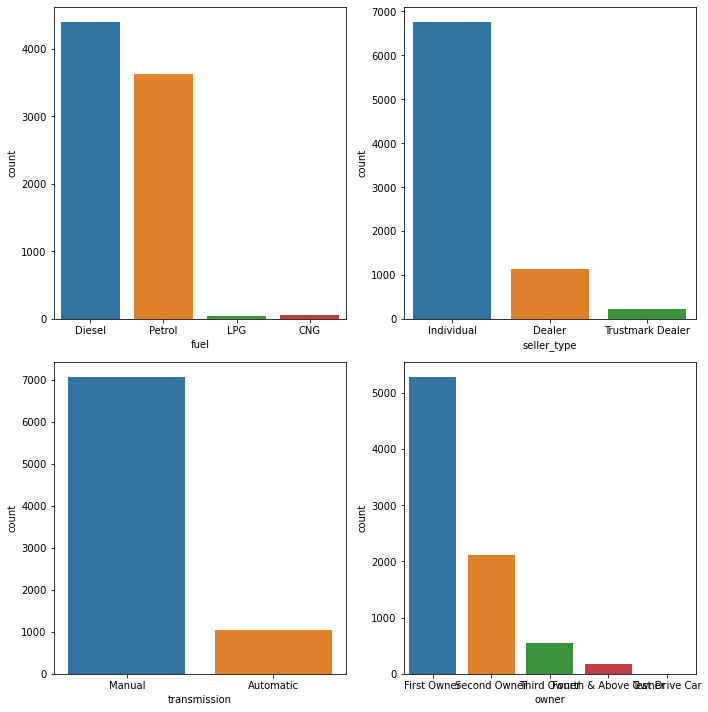

In [178]:
cols_df = ['fuel','seller_type','transmission','owner']
plt.figure(figsize=(10,10))
for i in range(len(cols_df)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=cols_df[i], data=df)
    
plt.tight_layout()


In [179]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['year', 'selling_price', 'km_driven', 'mileage(kmpl,km/kg,km/charge\n)', 'engine (CC)', 'seats']


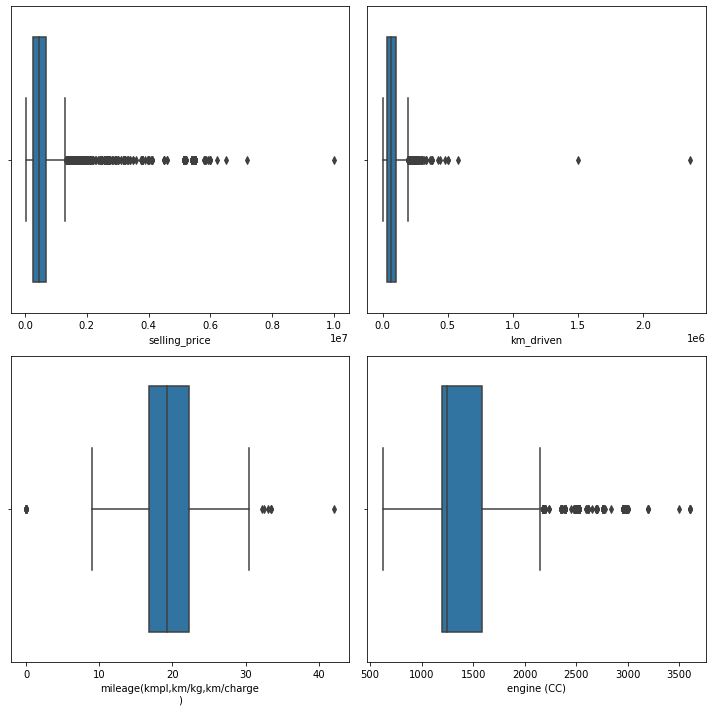

In [180]:
numcols_df = ['selling_price', 'km_driven', 'mileage(kmpl,km/kg,km/charge\n)', 'engine (CC)']
plt.figure(figsize=(10,10))
for i in range(len(numcols_df)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=numcols_df[i], data=df)
    
plt.tight_layout()

Positively skewed numerical values

In [181]:
print(round(df[numerical].describe()),2)

         year  selling_price  km_driven  mileage(kmpl,km/kg,km/charge\n)  \
count  8128.0         8128.0     8128.0                           7906.0   
mean   2014.0       638272.0    69820.0                             19.0   
std       4.0       806253.0    56551.0                              4.0   
min    1983.0        29999.0        1.0                              0.0   
25%    2011.0       254999.0    35000.0                             17.0   
50%    2015.0       450000.0    60000.0                             19.0   
75%    2017.0       675000.0    98000.0                             22.0   
max    2020.0     10000000.0  2360457.0                             42.0   

       engine (CC)   seats  
count       7907.0  7907.0  
mean        1459.0     5.0  
std          504.0     1.0  
min          624.0     2.0  
25%         1197.0     5.0  
50%         1248.0     5.0  
75%         1582.0     5.0  
max         3604.0    14.0   2


1.Top 10 expensive vehicles?

2.Top 10 most powerful vehicle ?

3.Top 10 highest mileage vehicle ?

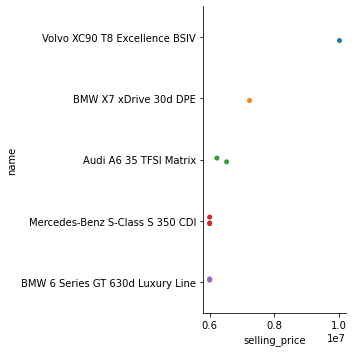

In [182]:
# Top 10 most expensive vehicle 

top_10_most_expensive_df = df.sort_values(by = 'selling_price' , ascending = False) 
top_10_most_expensive_df = top_10_most_expensive_df[:10]

sns.catplot(x = 'selling_price' ,  y = 'name' , data = top_10_most_expensive_df)

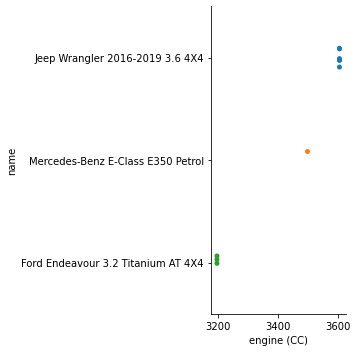

In [183]:
# Top 10 most powerful vehicles engines

top_10_powerful_vehicle_df = df.sort_values(by = 'engine (CC)' , ascending = False) 
top_10_powerful_vehicle_df = top_10_powerful_vehicle_df[:10]

sns.catplot(x = 'engine (CC)' , y = 'name' , data = top_10_powerful_vehicle_df)

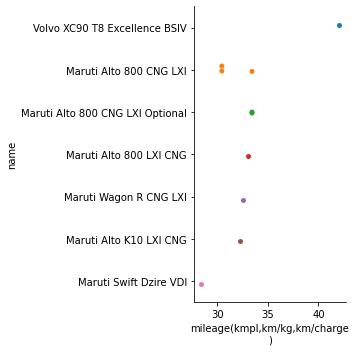

In [184]:
# Top 10 highest mileage vehicles 

top_10_highest_mileage_df = df.sort_values(by = 'mileage(kmpl,km/kg,km/charge\n)' , ascending = False) 
top_10_highest_mileage_df = top_10_highest_mileage_df[:10]

sns.catplot(x = 'mileage(kmpl,km/kg,km/charge\n)' , y = 'name' , data = top_10_highest_mileage_df)

 Correlation & Pair Plots

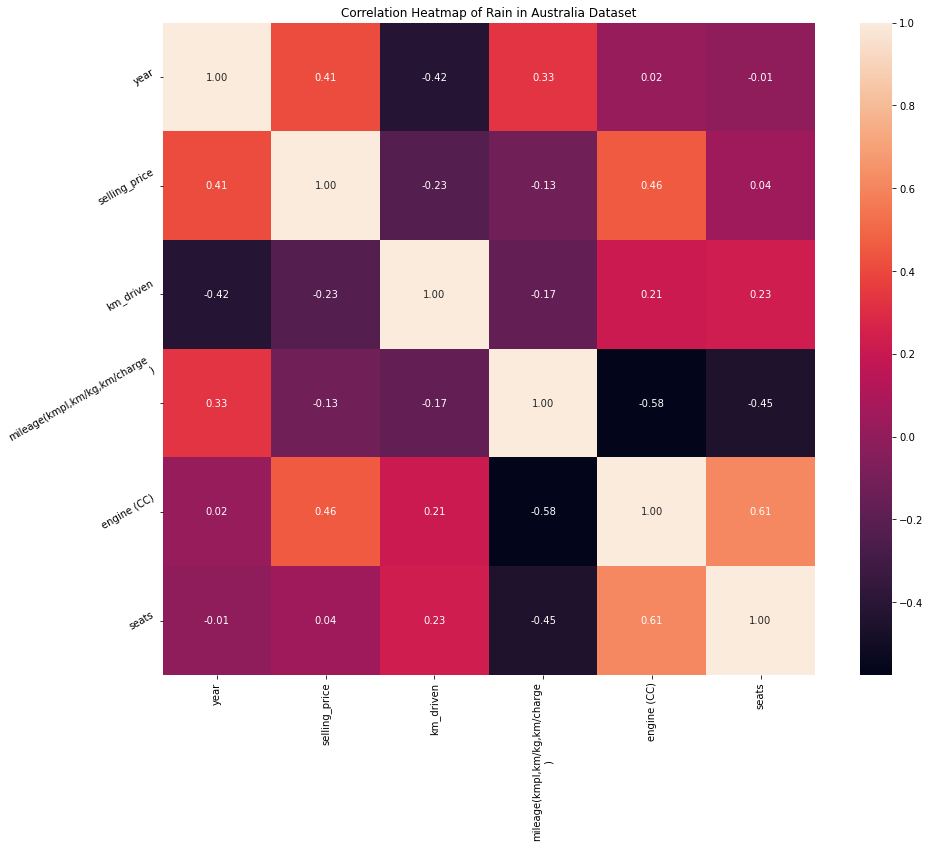

In [185]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

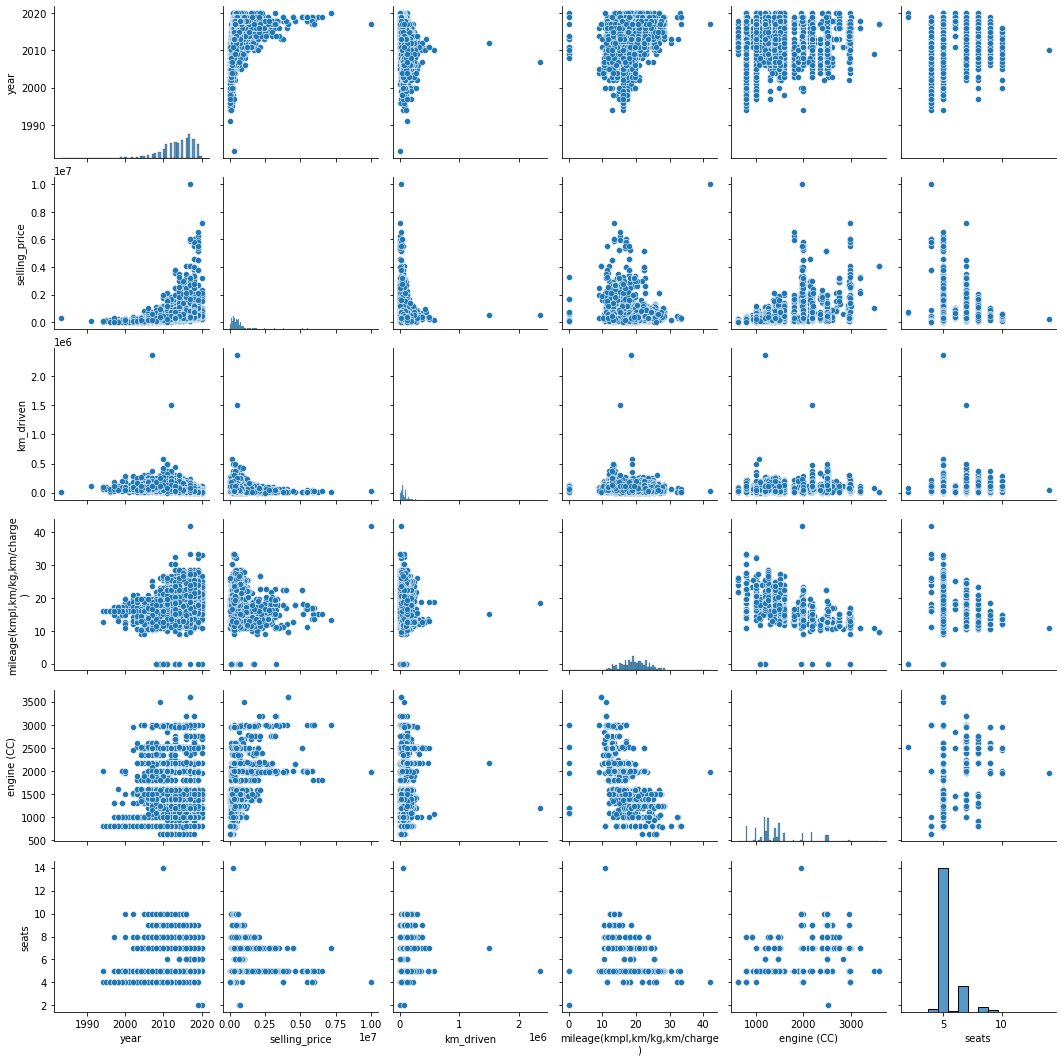

In [186]:
sns.pairplot(df)


<AxesSubplot:xlabel='year', ylabel='count'>

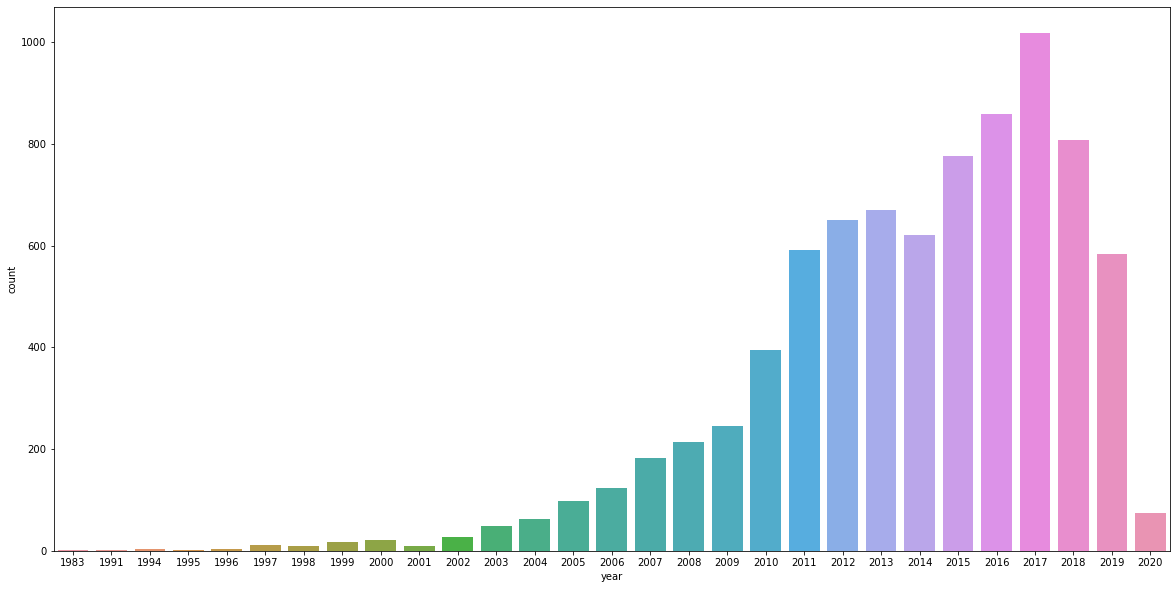

In [187]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'year'  ,data = df)

<AxesSubplot:xlabel='year', ylabel='selling_price'>

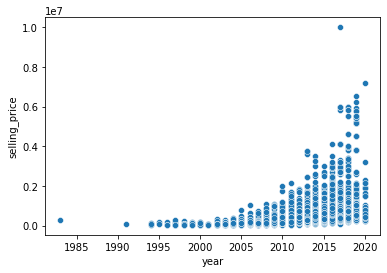

In [188]:
sns.scatterplot(x='year',y='selling_price',data=df)

As the age of car increases, the selling price decreases

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

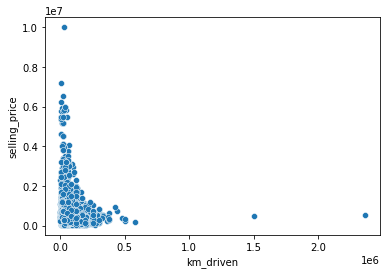

In [189]:
sns.scatterplot(x='km_driven',y='selling_price',data=df)

As the kms driven by car increases, the selling price decreases

<AxesSubplot:xlabel='mileage(kmpl,km/kg,km/charge\n)', ylabel='selling_price'>

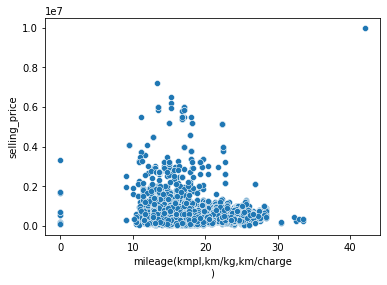

In [190]:
sns.scatterplot(x='mileage(kmpl,km/kg,km/charge\n)',y='selling_price',data=df)

<AxesSubplot:xlabel='engine (CC)', ylabel='selling_price'>

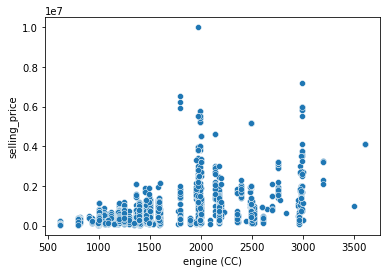

In [191]:
sns.scatterplot(x='engine (CC)',y='selling_price',data=df)

No such inference can be made about engine (cc) and kmpl with resopect to selling price of car

In [192]:
df1 = pd.get_dummies(df) 
df1

,year,selling_price,km_driven,"mileage(kmpl,km/kg,km/charge\n)",engine (CC),seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,17.70,1497.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,23.00,1396.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,16.10,1298.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8124,2007,135000,119000,16.80,1493.0,5.0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
8125,2009,382000,120000,19.30,1248.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
8126,2013,290000,25000,23.57,1396.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [193]:
df1.isnull().sum()

year                                 0
selling_price                        0
km_driven                            0
mileage(kmpl,km/kg,km/charge\n)    222
engine (CC)                        221
                                  ... 
owner_First Owner                    0
owner_Fourth & Above Owner           0
owner_Second Owner                   0
owner_Test Drive Car                 0
owner_Third Owner                    0
Length: 2078, dtype: int64

We need to impute the null values

In [194]:
nan_columns=[var for var in df.columns if df[var].isnull().sum()]
nan_columns

['mileage(kmpl,km/kg,km/charge\n)', 'engine (CC)', 'seats']

In [195]:
# Imputing missing values (all numerical with median)
for col in nan_columns:
        col_median=df[col].median()
        df1[col].fillna(col_median, inplace=True)      

In [196]:
df1.head()

,year,selling_price,km_driven,"mileage(kmpl,km/kg,km/charge\n)",engine (CC),seats,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,name_Ambassador Grand 2000 DSZ PW CL,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,23.40,1248.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,21.14,1498.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,17.70,1497.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,23.00,1396.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,16.10,1298.0,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [197]:
df1.isnull().sum()

year                               0
selling_price                      0
km_driven                          0
mileage(kmpl,km/kg,km/charge\n)    0
engine (CC)                        0
                                  ..
owner_First Owner                  0
owner_Fourth & Above Owner         0
owner_Second Owner                 0
owner_Test Drive Car               0
owner_Third Owner                  0
Length: 2078, dtype: int64

In [198]:
X = df1.drop(['selling_price'], axis=1)

y = df1['selling_price']

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [200]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()

lr_model.fit(X_train , y_train) 

score = lr_model.score(X_test ,y_test)

print(f"Score with linear regression : {score}")

Score with linear regression : 0.855565687025435


In [201]:
# now applying knn

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train,y_train)
pred=knr.predict(X_test)
print(knr.score(X_train,y_train))
print(knr.score(X_train,y_train))

0.8827833043759997
0.8827833043759997
